In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
#Read csv file into pandas
qual_stats = pd.read_csv('Data Frames/Data - Lead Pitchers/Pitchers_leaders__2010-2019.csv')
qual_stats.head()

,Unnamed: 0,Player,Team,Age,G,GS,CG,SHO,IP,H,ER,K,BB,HR,W,L,SV,BS,HLD,ERA,WHIP,Year
0,0,Justin Verlander,HOU,37,34,34,2,1,223.0,137,64,300,42,36,21,6,0,0,0,2.58,0.80,2019
1,1,Shane Bieber,CLE,25,34,33,3,2,214.1,186,78,259,40,31,15,8,0,0,0,3.28,1.05,2019
2,2,Gerrit Cole,HOU,30,33,33,0,0,212.1,142,59,326,48,29,20,5,0,0,0,2.50,0.89,2019
3,3,Stephen Strasburg,WAS,32,33,33,0,0,209.0,161,77,251,56,24,18,6,0,0,0,3.32,1.04,2019
4,4,Lance Lynn,TEX,33,33,33,0,0,208.1,195,85,246,59,21,16,11,0,0,0,3.67,1.22,2019


In [5]:
#Drop null values
qual_stats_df = qual_stats.dropna()

#add categorical column based on players over 30
qual_stats_df['Over 30'] = np.where(qual_stats_df['Age'] > 30, 1, 0)
qual_stats_df.head()

,Unnamed: 0,Player,Team,Age,G,GS,CG,SHO,IP,H,ER,K,BB,HR,W,L,SV,BS,HLD,ERA,WHIP,Year,Over 30
0,0,Justin Verlander,HOU,37,34,34,2,1,223.0,137,64,300,42,36,21,6,0,0,0,2.58,0.80,2019,1
1,1,Shane Bieber,CLE,25,34,33,3,2,214.1,186,78,259,40,31,15,8,0,0,0,3.28,1.05,2019,0
2,2,Gerrit Cole,HOU,30,33,33,0,0,212.1,142,59,326,48,29,20,5,0,0,0,2.50,0.89,2019,0
3,3,Stephen Strasburg,WAS,32,33,33,0,0,209.0,161,77,251,56,24,18,6,0,0,0,3.32,1.04,2019,1
4,4,Lance Lynn,TEX,33,33,33,0,0,208.1,195,85,246,59,21,16,11,0,0,0,3.67,1.22,2019,1


**First exploratory step:** create a table of correlation coefficients to determine what variables to further explore based on relationship strength 

### Data Relationship Exploration with qualified pitcher leaders stats

In [6]:
#Explore relationship between Wins and possible inputs
win_qual_stats = qual_stats_df[['W', 'K', 'ERA', 'WHIP', 'SV' ]]
win_qual_stats.corr(method='pearson')

,W,K,ERA,WHIP,SV
W,1.000000,0.418542,-0.548234,-0.503120,-0.007094
K,0.418542,1.000000,-0.501607,-0.591046,-0.062235
ERA,-0.548234,-0.501607,1.000000,0.808146,-0.001620
WHIP,-0.503120,-0.591046,0.808146,1.000000,0.023214
SV,-0.007094,-0.062235,-0.001620,0.023214,1.000000


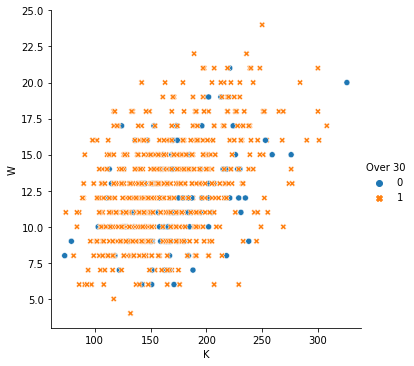

In [7]:
#Explore strikeouts and wins per season

sns.relplot(
    data=qual_stats_df,
    x="K", y="W", 
    hue="Over 30", style="Over 30"
)

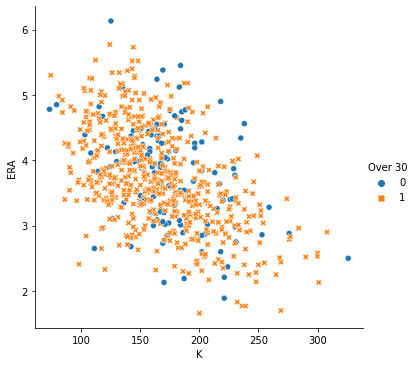

In [8]:
#Explore strikeouts and ERA per season

sns.relplot(
    data=qual_stats_df,
    x="K", y="ERA",
    hue="Over 30", style="Over 30"
)

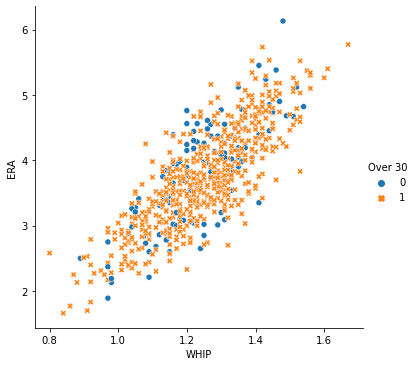

In [9]:
#Explore WHIP and wins per season

sns.relplot(
    data=qual_stats_df,
    x="WHIP", y="ERA", 
    hue="Over 30", style="Over 30"
)

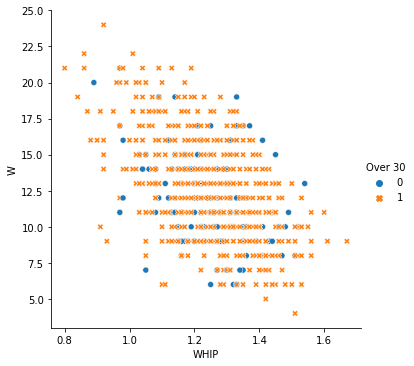

In [10]:
#Explore WHIP and wins per season

sns.relplot(
    data=qual_stats_df,
    x="WHIP", y="W", 
    hue="Over 30", style="Over 30"
)

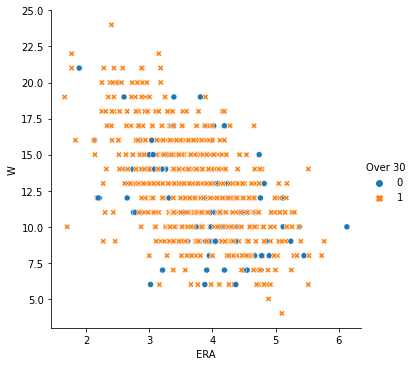

In [11]:
#Explore ERA and wins per season

sns.relplot(
    data=qual_stats_df,
    x="ERA", y="W", 
    hue="Over 30", style="Over 30"
)

### Model Prediction for W based on Strikeouts and WHIP utilizing ***"qualified"*** pitcher leader stats 2010 - 2020

In [13]:
#Create test and training data for determining WINS
from sklearn.model_selection import train_test_split

X = qual_stats_df[["K", "WHIP"]]
Y = qual_stats_df["W"].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Fit the model
model.fit(X_train, Y_train)
training_score = model.score(X_train, Y_train)
testing_score = model.score(X_test, Y_test)

#Print Scores

print(f"WIN Training Score - qualified: {training_score}")
print(f"WIN Testing Score - qualified: {testing_score}")

WIN Training Score - qualified: 0.2484956857172932
WIN Testing Score - qualified: 0.3441421764938044


In [14]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(Y_test, predictions)
r2 = model.score(X_test, Y_test)
### END SOLUTION

print(f"WIN MSE: {MSE}, WIN R2: {r2}")

WIN MSE: 8.292993571785017, WIN R2: 0.3441421764938044


Welp, those scores don't look too hot. 

### Model Prediction for W based on Strikeouts (K) and WHIP utilizing ***all*** pitcher stats from 2010 -2020 

In [16]:
#Read in all player stats 
all_stats = pd.read_csv('Data Frames/All Pitchers Data/Pitchers_2010-2019.csv')
all_stats.head()

,Unnamed: 0,Player,Team,Age,G,GS,CG,SHO,IP,H,ER,K,BB,HR,W,L,SV,BS,HLD,ERA,WHIP,Year
0,0,Justin Verlander,HOU,37.0,34,34,2,1,223.0,137,64,300,42,36,21,6,0,0,0,2.58,0.80,2019
1,1,Shane Bieber,CLE,25.0,34,33,3,2,214.1,186,78,259,40,31,15,8,0,0,0,3.28,1.05,2019
2,2,Gerrit Cole,HOU,30.0,33,33,0,0,212.1,142,59,326,48,29,20,5,0,0,0,2.50,0.89,2019
3,3,Stephen Strasburg,WAS,32.0,33,33,0,0,209.0,161,77,251,56,24,18,6,0,0,0,3.32,1.04,2019
4,4,Mike Minor,TEX,32.0,32,32,2,1,208.1,190,83,200,68,30,14,10,0,0,0,3.59,1.24,2019


In [17]:
#Drop null values
all_stats_df = all_stats.dropna()

#Create test and training data for determining WINS
from sklearn.model_selection import train_test_split

X = all_stats_df[["K", "WHIP"]]
Y = all_stats_df["W"].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Fit the model
model.fit(X_train, Y_train)
training_score = model.score(X_train, Y_train)
testing_score = model.score(X_test, Y_test)

#Print Scores

print(f"WIN Training Score: {training_score}")
print(f"WIN Testing Score: {testing_score}")

WIN Training Score: 0.7921834591588607
WIN Testing Score: 0.7862951014099606


NameError: ignored

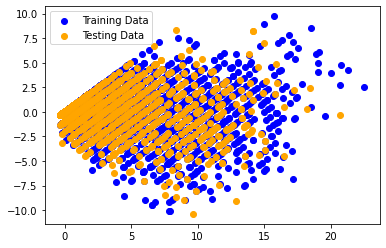

In [18]:
### Plot Residual Chart with test and train data
plt.scatter(model.predict(X_train), model.predict(X_train) - Y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - Y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(Y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot - Wins")



In [19]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(Y_test, predictions)
r2 = model.score(X_test, Y_test)
### END SOLUTION

print(f"WIN MSE: {MSE}, WIN R2: {r2}")

WIN MSE: 3.350208422311919, WIN R2: 0.7862951014099606


Better! Although it makes sense that a larger data set results in better scores, it is interesting that the same relationship did not exist with the "qualified" pitchers. Perhaps there are other variables that affect pitcher performance and/or result in a win. 

### Model Prediction for ERA based on K and WHIP using ***all pitcher stats 2010 - 2020***

In [21]:
#Create test and training data for determining ERA and split the data
from sklearn.model_selection import train_test_split

X = all_stats_df[["K", "WHIP"]]
Y = all_stats_df["ERA"].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Fit the model
model.fit(X_train, Y_train)
training_score = model.score(X_train, Y_train)
testing_score = model.score(X_test, Y_test)

#Print Scores

print(f"ERA Training Score: {training_score}")
print(f"ERA Testing Score: {testing_score}")

ERA Training Score: 0.7695272809345788
ERA Testing Score: 0.7816222133438682


NameError: ignored

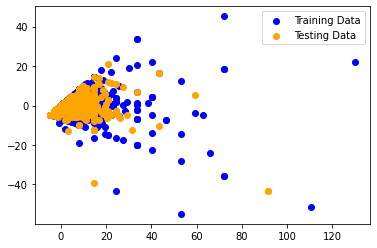

In [23]:
### Plot Residual Chart with test and train data
plt.scatter(model.predict(X_train), model.predict(X_train) - Y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - Y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(Y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot - ERA")



Given the wide range of data, will redo above with a standard scaler

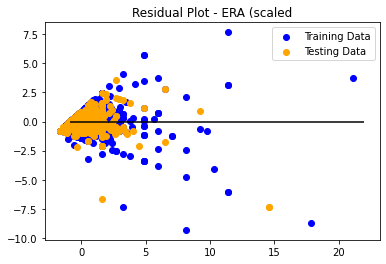

In [24]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(Y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(Y_train)
y_test_scaled = y_scaler.transform(Y_test)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot - ERA (scaled")
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"ERA scaled MSE: {MSE}, ERA scaled R2: {r2}")

ERA scaled MSE: 0.2178502699319292, ERA scaled R2: 0.7816222133438682


In [26]:
#Create test and training data for determining WINS
from sklearn.model_selection import train_test_split

X = all_stats_df[["K", "WHIP", "ERA"]]
Y = all_stats_df["W"].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Fit the model
model.fit(X_train, Y_train)
training_score = model.score(X_train, Y_train)
testing_score = model.score(X_test, Y_test)

#Print Scores

print(f"ERA Training Score: {training_score}")
print(f"ERA Testing Score: {testing_score}")

ERA Training Score: 0.7922231524889899
ERA Testing Score: 0.7863567486122933
